In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('titanic.csv')

In [4]:
print(df.head())

                                       char     charname  \
0  http://www.wikidata.org/entity/Q18754954         Silk   
1   http://www.wikidata.org/entity/Q3127430     Snowbird   
2    http://www.wikidata.org/entity/Q546340  Thunderbird   
3   http://www.wikidata.org/entity/Q1194236   Cannonball   
4   http://www.wikidata.org/entity/Q2087326       Shriek   

                 birthname                                              types  \
0               Cindy Moon                           mutate, comics character   
1                    Narya  demigod or quasi-deity in a work of fiction, c...   
2           John Proudstar   television character, animated character, mutant   
3   Samuel Zachery Guthrie  superhero film character, animated character, ...   
4  Frances Louise Barrison                   film character, comics character   

                    universes birthplace  \
0  Earth-616, Marvel Universe        NaN   
1             Marvel Universe        NaN   
2             Marvel

In [5]:
X = df[['types', 'universes', 'superpowers', 'religions', 'gender', 'occupation', 'memberof']]
y = df['charname']  # Assuming 'charname' is your target variable, change it to 'HeroOrVillain' if necessary

In [6]:
# Perform one-hot encoding for categorical features
X = pd.get_dummies(X, columns=['types', 'universes', 'superpowers', 'religions', 'gender', 'occupation', 'memberof'], drop_first=True)


In [8]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# Defining the value of k
k = 5

In [11]:
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [12]:
# Printing the accuracy
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


In [13]:
# Let's try different values of k and check their accuracies
k_values = [3, 9]

In [14]:
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy for k =', k, ':', metrics.accuracy_score(y_test, y_pred))

Accuracy for k = 3 : 0.0
Accuracy for k = 9 : 0.0


In [15]:
# Now, let's visualize the effect of different values of k on the accuracy
training_acc = []
test_acc = []
neighbors_setting = range(1, 20)

In [16]:
for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

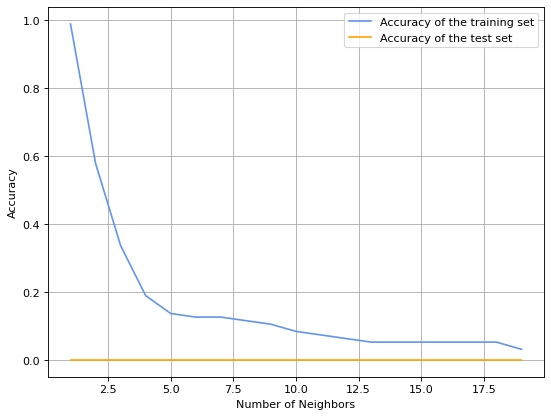

In [17]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(neighbors_setting, training_acc, label='Accuracy of the training set', color='cornflowerblue')
plt.plot(neighbors_setting, test_acc, label='Accuracy of the test set', color='orange')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()